# 1. Program to predict using ANN

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'], drop_first=True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [7]:
X=pd.concat([X,geography,gender],axis=1)
X=X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [8]:
#!pip install sklearn
#!pip install scikit-learn

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
import keras  
from keras.models import Sequential 
from keras.layers import Dense
#from keras.layers import LeakyReLU,PReLU,ELU
#from keras.layers import Dropout

In [12]:
classifier = Sequential()

In [13]:
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

In [14]:
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [15]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 10)

Epoch 1/10
536/536 [==============================] - 1s 2ms/step - loss: 0.6742 - accuracy: 0.6966 - val_loss: 0.5265 - val_accuracy: 0.7724
Epoch 2/10
536/536 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 0.7794 - val_loss: 0.4910 - val_accuracy: 0.7970
Epoch 3/10
536/536 [==============================] - 1s 1ms/step - loss: 0.5067 - accuracy: 0.7888 - val_loss: 0.4752 - val_accuracy: 0.7982
Epoch 4/10
536/536 [==============================] - 1s 1ms/step - loss: 0.4909 - accuracy: 0.7908 - val_loss: 0.4648 - val_accuracy: 0.8008
Epoch 5/10
536/536 [==============================] - 1s 1ms/step - loss: 0.4791 - accuracy: 0.7919 - val_loss: 0.4561 - val_accuracy: 0.8005
Epoch 6/10
536/536 [==============================] - 1s 1ms/step - loss: 0.4696 - accuracy: 0.7942 - val_loss: 0.4496 - val_accuracy: 0.8031
Epoch 7/10
536/536 [==============================] - 1s 1ms/step - loss: 0.4617 - accuracy: 0.7949 - val_loss: 0.4450 - val_accuracy: 0.8027
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


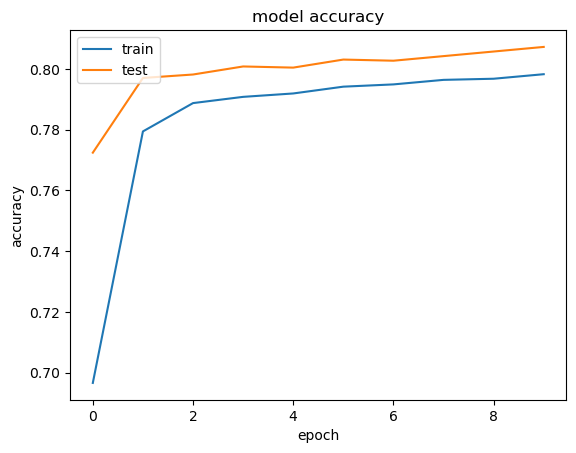

In [17]:
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

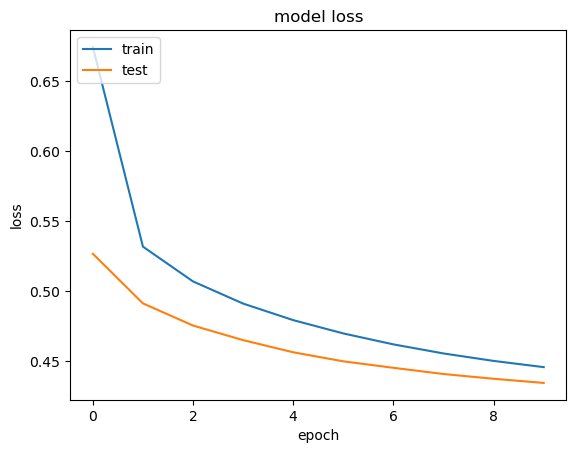

In [18]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 709us/step


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1593,   12],
       [ 357,   38]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8155